In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import csv
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_excel('price1_5low.xlsx')
print("数据相关信息：\n")
print (data.describe())
print("DataHead")

In [3]:
print (data.head())

        date      time  price1      MW1      MW2      MW3  MW4   MW5   MW6  \
0 2021-12-01  00:15:00  349.88  58315.6  10231.0  7953.15  0.0  4645  7525   
1 2021-12-01  00:30:00  351.36  58164.9  10231.0  7897.84  0.0  4645  7525   
2 2021-12-01  00:45:00  351.28  57976.4  10231.0  7851.61  0.0  4645  7525   
3 2021-12-01  01:00:00  350.66  57750.4  10231.0  7811.62  0.0  4645  7525   
4 2021-12-01  01:15:00  349.86  57448.9  10231.0  7773.40  0.0  4645  7525   

      MW7      pub1      pub2  
0  2477.0  35486.45  25484.45  
1  2477.0  35391.06  25389.06  
2  2477.0  35248.79  25246.79  
3  2477.0  35062.78  25060.78  
4  2477.0  34799.50  24797.50  


In [4]:
print (data.shape)

(3456, 12)


In [5]:
index=data.index

In [6]:
class_names=np.unique(data.iloc[:,1])

In [7]:
print("Classnames:")

Classnames:


In [8]:
print("Classnames:")
print (class_names)

Classnames:
[datetime.time(0, 0) datetime.time(0, 15) datetime.time(0, 30)
 datetime.time(0, 45) datetime.time(1, 0) datetime.time(1, 15)
 datetime.time(1, 30) datetime.time(1, 45) datetime.time(2, 0)
 datetime.time(2, 15) datetime.time(2, 30) datetime.time(2, 45)
 datetime.time(3, 0) datetime.time(3, 15) datetime.time(3, 30)
 datetime.time(3, 45) datetime.time(4, 0) datetime.time(4, 15)
 datetime.time(4, 30) datetime.time(4, 45) datetime.time(5, 0)
 datetime.time(5, 15) datetime.time(5, 30) datetime.time(5, 45)
 datetime.time(6, 0) datetime.time(6, 15) datetime.time(6, 30)
 datetime.time(6, 45) datetime.time(7, 0) datetime.time(7, 15)
 datetime.time(7, 30) datetime.time(7, 45) datetime.time(8, 0)
 datetime.time(8, 15) datetime.time(8, 30) datetime.time(8, 45)
 datetime.time(9, 0) datetime.time(9, 15) datetime.time(9, 30)
 datetime.time(9, 45) datetime.time(10, 0) datetime.time(10, 15)
 datetime.time(10, 30) datetime.time(10, 45) datetime.time(11, 0)
 datetime.time(11, 15) datetime.tim

In [9]:
data_train, data_test= train_test_split(data,test_size=0.1, random_state=0)

In [10]:
print ("训练集统计描述：\n",data_train.describe().round(2))

训练集统计描述：
         price1       MW1       MW2       MW3      MW4      MW5      MW6  \
count  3110.00   3110.00   3110.00   3110.00  3110.00  3110.00  3110.00   
mean    363.30  62862.59  12966.77   5095.77  1102.02  4952.59  7934.57   
std     226.79   5440.10   2059.09   3303.61  1729.37   204.30   215.41   
min     -80.00  50088.40   8023.00    320.02     0.00  4575.00  7525.00   
25%     229.85  58369.70  11181.00   2142.71     0.00  4815.00  7710.00   
50%     350.00  62391.40  13236.00   4807.94     1.86  4905.00  8050.00   
75%     467.00  66694.85  14681.00   7566.23  2026.18  5105.00  8120.00   
max    1187.00  78275.00  18473.00  14914.50  5632.94  5625.00  8220.00   

           MW7      pub1      pub2  
count  3110.00   3110.00   3110.00  
mean   2689.66  38745.44  28121.20  
std     529.92   5639.70   5726.01  
min     285.22  21727.37  10261.34  
25%    2472.00  35054.07  24457.88  
50%    2475.32  38790.92  28154.26  
75%    2979.48  42806.39  32266.13  
max    4381.89  53

In [11]:
print ("验证集统计描述：\n",data_test.describe().round(2))

验证集统计描述：
         price1       MW1       MW2       MW3      MW4      MW5      MW6  \
count   346.00    346.00    346.00    346.00   346.00   346.00   346.00   
mean    365.69  62561.73  12685.76   5063.43  1043.01  4982.25  7926.36   
std     199.22   5292.64   2086.24   3354.80  1600.95   221.40   222.98   
min     -80.00  53432.80   8023.00    372.78     0.00  4575.00  7525.00   
25%     244.05  58262.42  10689.75   1980.82     0.00  4855.00  7700.00   
50%     353.32  62147.50  12520.00   4900.10     1.88  4955.00  8050.00   
75%     461.00  66644.90  14429.00   7544.42  1853.98  5105.00  8140.00   
max    1125.40  76055.90  18473.00  14774.90  5524.65  5625.00  8220.00   

           MW7      pub1      pub2  
count   346.00    346.00    346.00  
mean   2703.10  38787.28  28157.81  
std     556.27   5245.23   5366.72  
min     285.85  24050.22  12990.04  
25%    2472.00  35249.66  24681.36  
50%    2504.62  38861.87  28220.09  
75%    2906.66  42463.26  31854.61  
max    4422.62  52

In [12]:
print ("训练集信息：\n",data_train.iloc[:,2].value_counts())

训练集信息：
 -80.00     205
 402.00     12
 472.00     11
 440.00     11
 442.00     11
          ... 
 429.48      1
 656.00      1
 249.54      1
 345.46      1
 104.67      1
Name: price1, Length: 1967, dtype: int64


In [13]:
print ("验证集信息：\n",data_test.iloc[:,2].value_counts())

验证集信息：
 -80.00     17
 177.00     3
 406.00     3
 428.00     3
 452.00     2
           ..
 283.00     1
 309.00     1
 353.00     1
 246.65     1
 42.00      1
Name: price1, Length: 306, dtype: int64


In [14]:
X_train=data_train.iloc[:,4:10]#  data_train.iloc[:,0:-2]

In [15]:
print(X_train)

          MW2      MW3      MW4   MW5   MW6      MW7
263   14703.0  2700.28     2.43  5155  7670  2804.53
1420  14657.0   863.19     0.17  4875  7710  2472.00
1697  14729.0  6104.90   334.85  4795  8080  2472.00
1751  11077.0  6532.49     0.90  4775  8080  2472.19
3175  10728.0  6185.23     0.00  5285  8200  2463.00
...       ...      ...      ...   ...   ...      ...
835   14756.0  1052.85    20.69  5105  7750  2535.38
3264  10828.0  3913.95     0.00  5335  8200  2463.00
1653  10231.0  9284.16     0.14  4795  8080  2472.00
2607  11181.0  6955.32     0.00  5005  8220  2465.00
2732  13807.0  7882.39  5113.91  4955  8175  3479.81

[3110 rows x 6 columns]


In [16]:
X_test=data_test.iloc[:,4:10] #data_train.iloc[:,0:-2]

In [17]:
print(X_test)

          MW2       MW3      MW4   MW5   MW6      MW7
3064   9907.0   9767.67     0.00  4815  8140  2465.00
2587  12728.0   5699.52     0.00  5005  8220  2465.00
2831  10873.0   5510.12  5318.95  4665  8080  3505.82
3383  11763.0   2340.62     8.22  5625  8100  2463.28
955   11406.0   1036.64     0.00  5105  7750  2474.00
...       ...       ...      ...   ...   ...      ...
2262  12458.0  14375.80  2397.90  5025  8170  2969.54
621   12137.0   1978.98  4583.61  4905  7675  3521.53
3312  12708.0   2322.14  3810.92  5335  8200  3186.58
2994   8023.0   9961.18     0.00  4815  8140  2465.00
3218  12558.0   1590.92  4840.13  5285  8200  2463.00

[346 rows x 6 columns]


In [18]:
feature=data_train.iloc[:,4:10].columns

In [19]:
print (feature)

Index(['MW2', 'MW3', 'MW4', 'MW5', 'MW6', 'MW7'], dtype='object')


In [20]:
y_train=data_train.iloc[:,2]

In [21]:
print(y_train)

263     760.00
1420    571.08
1697    461.36
1751    250.82
3175    -80.00
         ...  
835     854.60
3264    317.22
1653    182.00
2607    176.10
2732    280.00
Name: price1, Length: 3110, dtype: float64


In [22]:
y_test=data_test.iloc[:,2]

In [23]:
data.drop([u'price1'],axis = 1).corr()

,MW1,MW2,MW3,MW4,MW5,MW6,MW7,pub1,pub2
MW1,1.000000,0.815776,-0.025751,-0.149079,0.097240,0.334872,0.032981,0.725519,0.698289
MW2,0.815776,1.000000,-0.120736,0.144013,0.118289,0.140879,0.144639,0.444683,0.418794
MW3,-0.025751,-0.120736,1.000000,-0.058323,-0.187452,0.212593,-0.009338,-0.546375,-0.544975
MW4,-0.149079,0.144013,-0.058323,1.000000,-0.048205,0.012353,0.531518,-0.467774,-0.510623
MW5,0.097240,0.118289,-0.187452,-0.048205,1.000000,0.065677,-0.165572,0.139300,0.150108
MW6,0.334872,0.140879,0.212593,0.012353,0.065677,1.000000,-0.034890,0.140715,0.103778
MW7,0.032981,0.144639,-0.009338,0.531518,-0.165572,-0.034890,1.000000,-0.172650,-0.262194
pub1,0.725519,0.444683,-0.546375,-0.467774,0.139300,0.140715,-0.172650,1.000000,0.995069
pub2,0.698289,0.418794,-0.544975,-0.510623,0.150108,0.103778,-0.262194,0.995069,1.000000


In [24]:
import seaborn as sns
sns.set(style="ticks", color_codes=True);
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])

In [25]:
print(palette)

[(0.0, 0.011764705882352941, 0.3568627450980392), (0.011764705882352941, 0.20784313725490197, 0.0), (0.8588235294117647, 0.7058823529411765, 0.047058823529411764), (0.9764705882352941, 0.45098039215686275, 0.023529411764705882)]


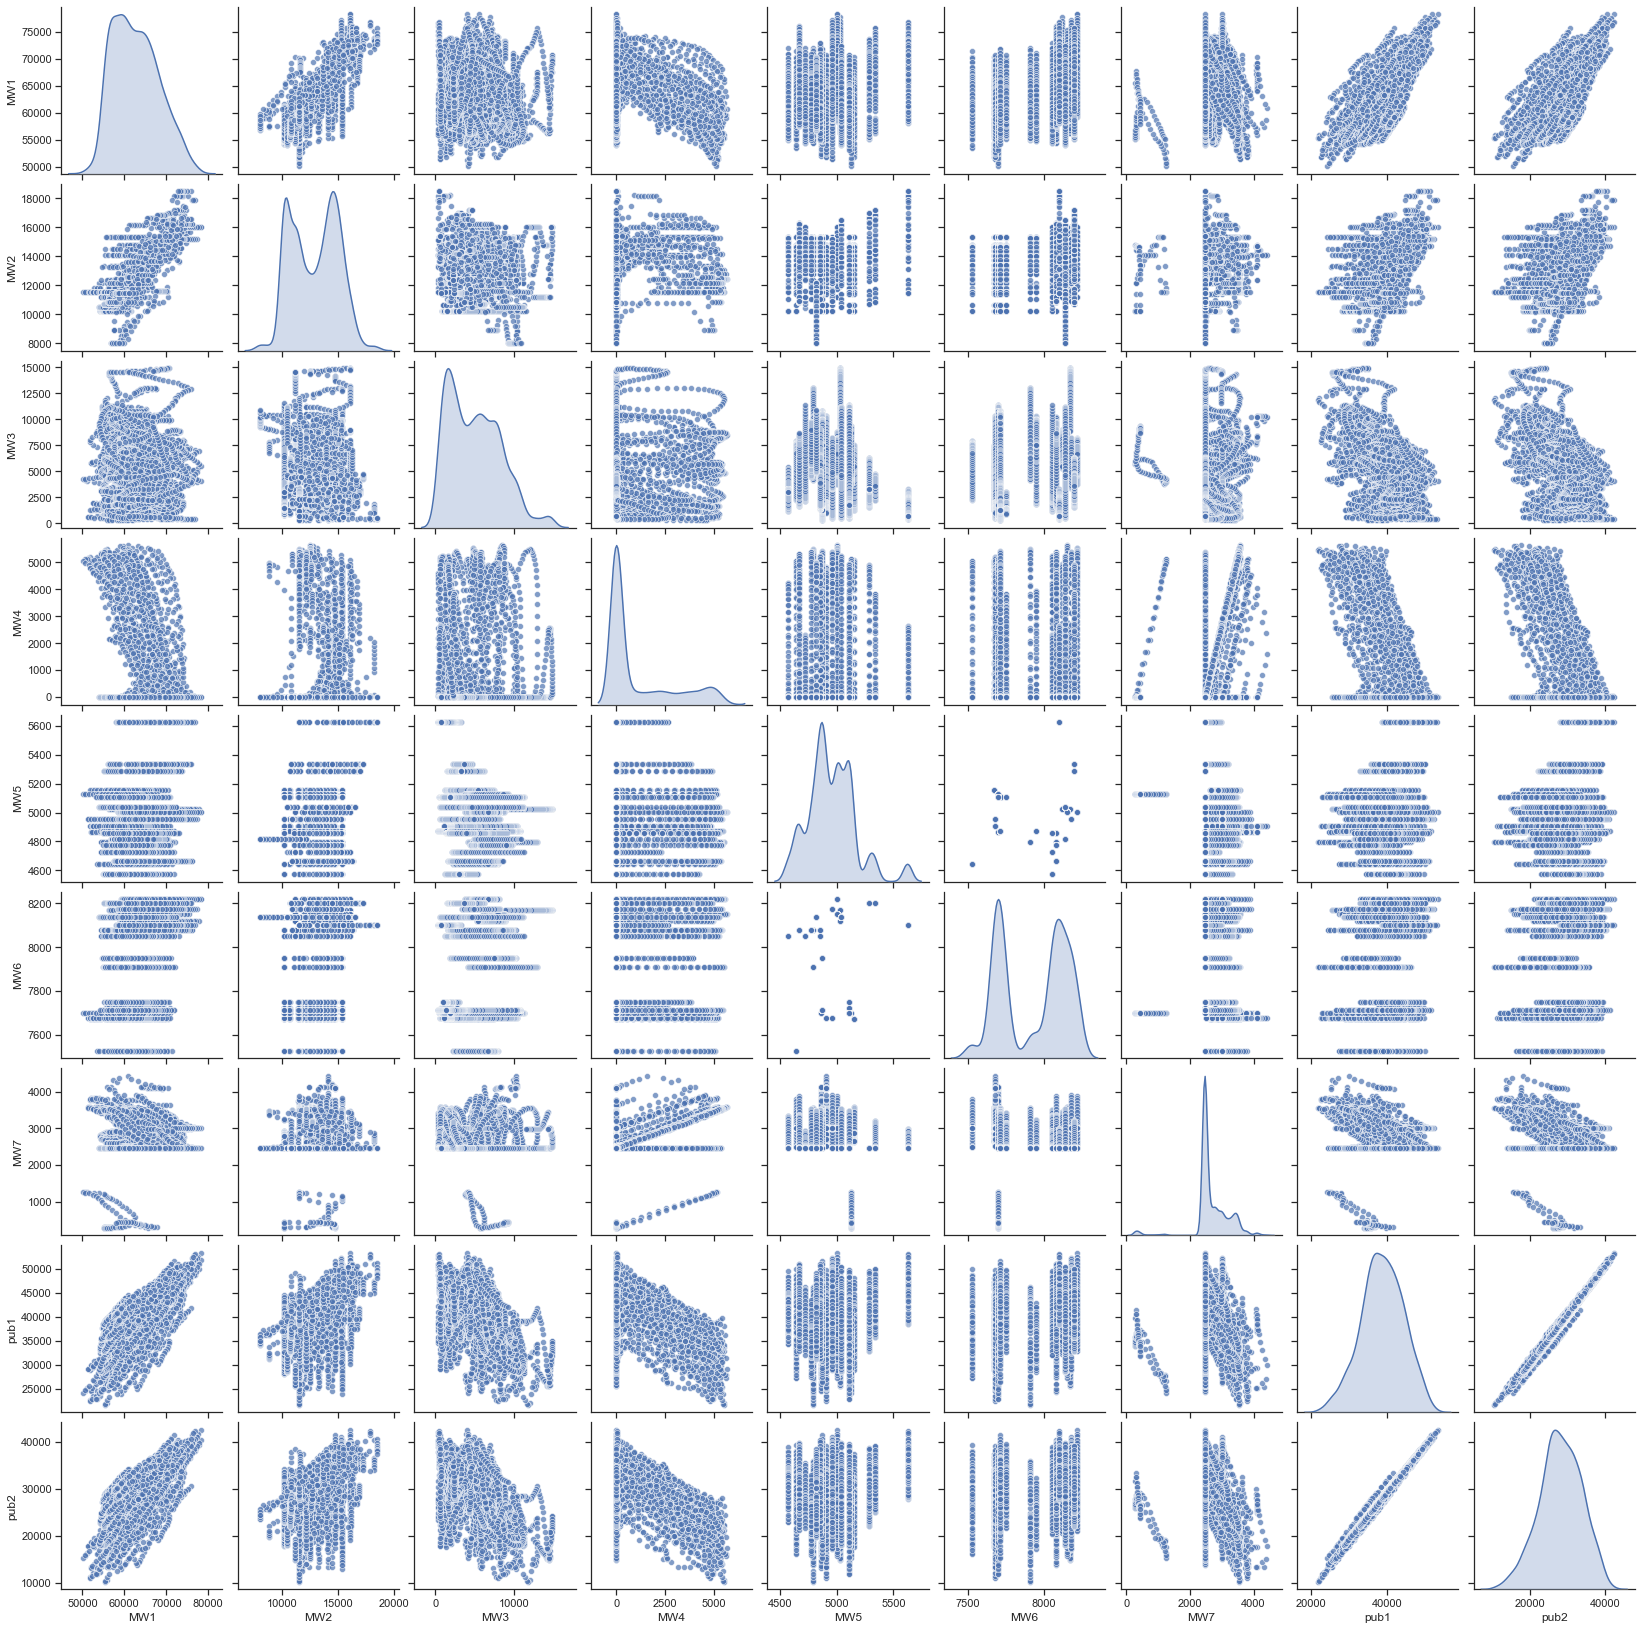

In [26]:
sns.pairplot(data.drop([u'price1'],axis = 1), diag_kind = 'kde', plot_kws=dict(alpha = 0.7))
plt.show()# 画散点图矩阵

In [27]:
from sklearn.model_selection import   GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
criterion=['mae','mse'] #决策树属性['gini','entropy']
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]

In [28]:
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'criterion':criterion,
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap}

In [29]:
#构模 随机森林
clf= RandomForestRegressor()
clf_random = RandomizedSearchCV(estimator=clf, param_distributions=random_grid,
                              n_iter = 10,  
                              cv = 3, verbose=2, random_state=42, n_jobs=1)

In [ ]:
criterion='absolute_error'

In [30]:
#回归
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mse, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.2s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mse, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.2s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mse, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.2s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mse, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   5.7s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mse, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   6.0s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mse, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   5.4s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.6s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.6s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mae, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.8s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   9.4s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   9.8s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   9.6s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 3.2min


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 2.8min


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 2.7min


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  16.2s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  16.5s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  16.2s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mse, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.3s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mse, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.3s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mse, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.3s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mse, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.8s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mse, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   2.7s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END bootstrap=True, criterion=mse, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   3.0s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=  46.0s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=  47.4s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mae, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=  41.6s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.9s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   3.0s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END bootstrap=False, criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   3.0s


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mae', 'mse'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [31]:
print (clf_random.best_params_)

{'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'mse', 'bootstrap': False}


In [32]:
rf=RandomForestRegressor(criterion='mse',bootstrap=False,max_features='sqrt', max_depth=20,min_samples_split=10,n_estimators=1200,min_samples_leaf=2)
rf.fit(X_train, y_train) 
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)
print(rf.feature_importances_)

C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[0.27973825 0.21145734 0.27987165 0.05406441 0.05249992 0.12236844]


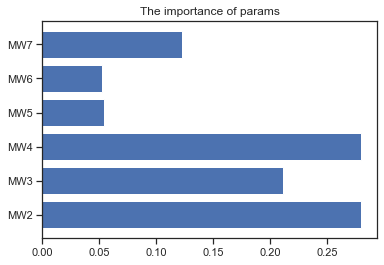

In [33]:
#变量重要性  
plt.barh(range(len(rf.feature_importances_)), rf.feature_importances_,tick_label=['MW2', 'MW3', 'MW4', 'MW5', 'MW6', 'MW7'])#,tick_label = class_names
plt.title('The importance of params')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print ("决策树模型评估--训练集：")
print ('训练r^2:',rf.score(X_train,y_train))

决策树模型评估--训练集：
训练r^2: 0.9841052465803214


In [35]:
print ('均方差',mean_squared_error(y_train,y_train_pred))

均方差 817.2720207878924


In [36]:
print ('绝对差',mean_absolute_error(y_train,y_train_pred))

绝对差 18.596220953269054


In [37]:
print ('解释度',explained_variance_score(y_train,y_train_pred))

解释度 0.9841052465803214


In [38]:
print ("决策树模型评估--验证集：")
print ('验证r^2:',rf.score(X_test,y_test))

决策树模型评估--验证集：
验证r^2: 0.9315948306484567


In [39]:
print ('均方差',mean_squared_error(y_test,y_test_pred))

均方差 2706.968165211423


In [40]:
print ('绝对差',mean_absolute_error(y_test,y_test_pred))

绝对差 35.49059312229793


In [41]:
print ('解释度',explained_variance_score(y_test,y_test_pred))

解释度 0.9317026374532595


In [42]:
data_pred=pd.read_excel('predict.xlsx',index_col=0,encoding='gb2312')
index=data_pred.index
print("预测:")
print(index)
y_pred=rf.predict(data_pred.values[:,4:10])
result_reg=pd.DataFrame(index)
result_reg['price1']=y_pred
result_reg.to_csv('result_preg.txt',encoding='gb2312')

预测:
DatetimeIndex(['2022-01-07', '2022-01-07', '2022-01-07', '2022-01-07',
               '2022-01-07', '2022-01-07', '2022-01-07', '2022-01-07',
               '2022-01-07', '2022-01-07', '2022-01-07', '2022-01-07',
               '2022-01-07', '2022-01-07', '2022-01-07', '2022-01-07',
               '2022-01-07', '2022-01-07', '2022-01-07', '2022-01-07',
               '2022-01-07', '2022-01-07', '2022-01-07', '2022-01-07',
               '2022-01-07', '2022-01-07', '2022-01-07', '2022-01-07',
               '2022-01-07', '2022-01-07', '2022-01-07', '2022-01-07',
               '2022-01-07', '2022-01-07', '2022-01-07', '2022-01-07',
               '2022-01-07', '2022-01-07', '2022-01-07', '2022-01-07',
               '2022-01-07', '2022-01-07', '2022-01-07', '2022-01-07',
               '2022-01-07', '2022-01-07', '2022-01-07', '2022-01-07',
               '2022-01-07', '2022-01-07', '2022-01-07', '2022-01-07',
               '2022-01-07', '2022-01-07', '2022-01-07', '2022-01-07',
  

C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [48]:
data1=pd.read_csv('result_preg.txt')
print("预测相关信息：\n")
print(data1)

预测相关信息：

    Unnamed: 0        date    price1
0            0  2022-01-07 -5.400598
1            1  2022-01-07 -5.400598
2            2  2022-01-07 -5.400598
3            3  2022-01-07 -5.400598
4            4  2022-01-07 -5.400598
..         ...         ...       ...
91          91  2022-01-07 -5.400598
92          92  2022-01-07 -5.400598
93          93  2022-01-07 -5.400598
94          94  2022-01-07 -5.400598
95          95  2022-01-07 -5.400598

[96 rows x 3 columns]


In [50]:
data2=pd.read_excel('True1-7.xlsx')
acc=data2['price']
print(acc)

0     440.00
1     432.00
2     423.20
3     414.47
4     406.00
       ...  
91    354.00
92    369.24
93    356.00
94    334.00
95    316.17
Name: price, Length: 96, dtype: float64


In [49]:
pre=data1['price1']
print(pre)
#acc 实际值数据
#pre 预测值数据

0    -5.400598
1    -5.400598
2    -5.400598
3    -5.400598
4    -5.400598
        ...   
91   -5.400598
92   -5.400598
93   -5.400598
94   -5.400598
95   -5.400598
Name: price1, Length: 96, dtype: float64


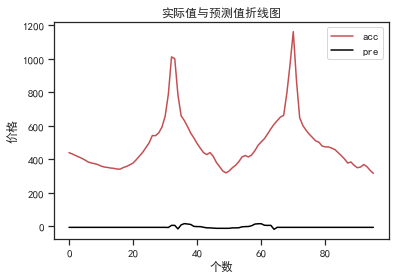

In [52]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.plot(acc,color="r",label="acc") #颜色表示
plt.plot(pre,color=(0,0,0),label="pre") 
plt.xlabel("个数") 
plt.ylabel("价格") 
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show() 

In [ ]:
#离谱